In [0]:
import numpy as np
import matplotlib.pyplot as plt

# generate data between boundaries
n = 500
x = np.linspace(-2, 2, n)
y = np.linspace(-2, 2, n)

In [0]:
# drop wave function
import numpy as np

def drop_wave(x, y):
  fxy = np.zeros((n, n))
  for i in range(0, x.shape[0]):
    for j in range (0, y.shape[0]):
      nominator = 1 + np.cos(np.multiply(12, np.sqrt(x[i]**2 + y[j]**2)))
      denominator = np.multiply(0.5, (x[i]**2 + y[j]**2)) + 2
      fxy[i][j] = -(nominator/denominator)
      
  return fxy

In [0]:
drop = drop_wave(x, y)

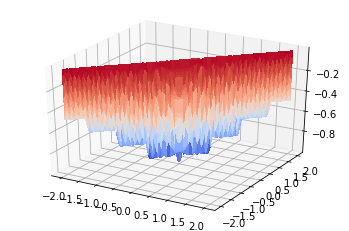

In [38]:
# plot output of function
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, drop, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

In [0]:
# generate Gaussian noise of shape (500, 500) between ranges (0, 1)
noise = np.random.randn(n, n)

In [0]:
# function to add noise to output of drop-wave function
def add_noise(input_matrix, noise_matrix):
  output = np.zeros((n, n))
  for i in range(0, input_matrix.shape[0]):
    for j in range(0, input_matrix.shape[1]):
      output[i][j] = input_matrix[i][j] + np.multiply(0.05, noise_matrix[i][j])
  
  return output

In [0]:
new_output = add_noise(drop, noise)

In [0]:
# Generate a list of n unique random numbers within a range to be used as indexes for arrangement
import random

def arrangem(total):  
  trainList = []
  validList = []
  testList = []
  # generate list of random numbers
  randomList = random.sample(range(0, total), total)
  randomList = np.array(randomList)
  # get train list (70% of overall data)
  trainend = int((total) * 0.70)
  trainList = randomList[0:trainend]
  # get validation list (15% of overall data)
  validstart = trainend
  validend = int(total * 0.15 + validstart)
  validList = randomList[validstart:validend]
  # get testing list (15% of overall data)
  teststart = validend
  testList = randomList[teststart:]  
  # for i in range(0, total):    
  #   print(i, randomList[i])
  # for j in range(0, int(total * 0.70)):
  #   print(j, trainList[j])
  # for k in range(0, int(total * 0.15)):
  #   print(k, validList[k])
  # for l in range(0, int(total * 0.15)):
  #   print(l, testList[l])
  return trainList, validList, testList

In [0]:
# obtain list
trainList, validList, testList = arrangem(500)

In [0]:
# function to assign train, test, validation datasets
def assign(x, y, fxy, train, valid, test): 
  train_label = np.zeros((len(train), len(train)))
  train_val = np.zeros((len(train), len(train)))
  test_label = np.zeros((len(test), len(test)))
  test_val = np.zeros((len(test), len(test)))
  valid_label = np.zeros((len(valid), len(valid)))
  valid_val = np.zeros((len(valid), len(valid)))

  for i in range (0, len(train)):
    for j in range (0, len(train)):
      train_val[i] = x[train[i]]
      train_val[j] = y[train[j]]
      train_label[i][j] = new_output[train[i]][train[j]]
  train_val = train_label.flatten().reshape(-1, 1)
  train_label = train_val.flatten()

  for i in range (0, len(test)):
    for j in range (0, len(test)):
      test_val[i] = x[test[i]]
      test_val[j] = y[test[j]]
      test_label[i][j] = new_output[test[i]][test[j]]
  test_val = test_label.flatten().reshape(-1, 1)
  test_label = test_val.flatten()

  for i in range (0, len(valid)):
    for j in range (0, len(valid)):
      valid_val[i] = x[valid[i]]
      valid_val[j] = y[valid[j]]
      valid_label[i][j] = new_output[valid[i]][valid[j]]
  valid_val = valid_label.flatten().reshape(-1, 1)
  valid_label = valid_val.flatten()

  return train_label, train_val, test_label, test_val, valid_label, valid_val

In [0]:
# get x (values) and y (labels) datasets
train_label, train_val, test_label, test_val, valid_label, valid_val = assign(x, y, new_output, trainList, validList, testList)

In [783]:
# define model
from sklearn.neural_network import MLPRegressor

# tune model parameters
iteration = 100
activate = 'tanh'
learn_rate = 0.0001

regress = MLPRegressor(alpha=learn_rate, hidden_layer_sizes = (8, 48, 16), max_iter = iteration, solver='adam', random_state=True,
                 activation = activate, verbose = 'True', n_iter_no_change=1000000)
# fit training data into model and start training
model = regress.fit(train_val, train_label)

Iteration 1, loss = 0.00059565
Iteration 2, loss = 0.00002009
Iteration 3, loss = 0.00001627
Iteration 4, loss = 0.00001529
Iteration 5, loss = 0.00001432
Iteration 6, loss = 0.00001364
Iteration 7, loss = 0.00001281
Iteration 8, loss = 0.00001369
Iteration 9, loss = 0.00001377
Iteration 10, loss = 0.00001317
Iteration 11, loss = 0.00001324
Iteration 12, loss = 0.00001291
Iteration 13, loss = 0.00001277
Iteration 14, loss = 0.00001240
Iteration 15, loss = 0.00001279
Iteration 16, loss = 0.00001160
Iteration 17, loss = 0.00001203
Iteration 18, loss = 0.00001164
Iteration 19, loss = 0.00001141
Iteration 20, loss = 0.00001157
Iteration 21, loss = 0.00001103
Iteration 22, loss = 0.00001092
Iteration 23, loss = 0.00001077
Iteration 24, loss = 0.00001071
Iteration 25, loss = 0.00001036
Iteration 26, loss = 0.00001020
Iteration 27, loss = 0.00001029
Iteration 28, loss = 0.00000990
Iteration 29, loss = 0.00000997
Iteration 30, loss = 0.00000948
Iteration 31, loss = 0.00000936
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [786]:
# get model parameters
model.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (8, 48, 16),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 1000000,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': True,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 'True',
 'warm_start': False}

In [0]:
# make predictions on dataset using model
train_predict = model.predict(train_val)
test_predict = model.predict(test_val)
valid_predict = model.predict(valid_val)

In [0]:
# function to calculate root mean square error (RMSE)
def calculate_err(output, input):
  output = np.sum(output)
  input = np.sum(input)
  rmse = np.sqrt(np.multiply((1/250000), (output - input)**2))
  return rmse

In [785]:
# calculate RMSE for datasets, as well as Err_train/Err_val ratio
err_train = calculate_err(train_predict, train_val)
err_valid = calculate_err(valid_predict, valid_val)
err_test = calculate_err(test_predict, test_val)

print("Err_train:", err_train)
print("Err_valid:", err_valid)
print("Err_test:", err_test)
print("Err_train/Err_valid:", err_train/err_valid)

Err_train: 0.3897840667035198
Err_valid: 0.017677049693370916
Err_test: 0.017979888155818118
Err_train/Err_valid: 22.05028969566641


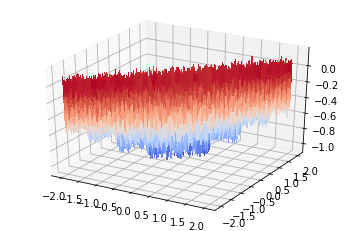

In [258]:
# plot trained function, f^(x,y)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, new_output, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

In [0]:
# reshape predicted dataset to plot graph for predicted function
val_x = np.zeros((len(validList)))
val_y = np.zeros((len(validList)))
new_predict = valid_predict.reshape(len(validList),len(validList))

for i in range(0, len(validList)):
  for j in range(0, len(validList)):
    val_x[i] = x[validList[i]]
    val_y[j] = y[validList[j]]

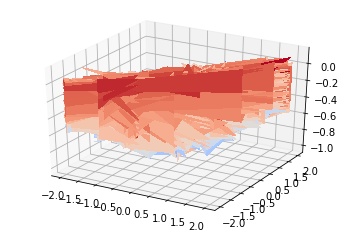

In [771]:
# plot function predicted from the model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(val_x, val_y, new_predict, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()